**Behavior and Imaging Correlation** 

This notebook provides tools for correlation between the normalized movement of experimental mice and the dF/F calcium two-photon imaging data to investigate possible involvement of recorded neurons in the motor activity from the corresponding video trials.

In [ ]:
import os
import json
import scipy
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pathlib import Path
from bodypart_calc import adjust_coordinates, velocity

# Input the pathway for the data in question. For CodeOcean, inputs need to be located in the data folder, outputs in scratch.
# If using the code locally, format path as shown below after the hash.

# raw_data_path = Path(f"{os.path.abspath(os.sep)}root") / "capsule" / "data"

raw_data = scipy.io.loadmat('/root/capsule/data/Jan18/bci_session_data/sorted_data/data_behav_BCI29_042222.mat')
trial_csv = '/root/capsule/scratch/DLC/trial_00003__2022-04-22_12-09-51/trial_00003__2022-04-22_12-09-51DLC_resnet50_ophys_pawsJul4shuffle1_100000.csv'
output_path = '/root/capsule/scratch/DLC/trial_00003__2022-04-22_12-09-51'
trial_json_path = '/root/capsule/data/single-plane-ophys_608551_2022-04-22_12-39-41/behavior-videos/side/2022-04-22_12-08-56/trial_00003__2022-04-22_12-09-51.json'

The array output from the following cell demonstrates the beginning and end times of trial within a session. For example, trial_00000 was recorded between frames 0 and 248, while trial_00001 was recording between 248 and 729.

In [2]:
# Pull the dF/F values into a variable.
dFF = raw_data['df_closedLoop'] # frames X neurons

# Print out the frame start and end times that correspond to the trials.
trial_start = raw_data['trial_start'].squeeze() # frames
rewards = raw_data['rew'].squeeze()
trial_start_index = np.where(trial_start==1)[0]
trial_start_index

array([    0,   248,   729,   868,  1249,  1453,  1607,  1794,  1950,
        2184,  2879,  3122,  3265,  3585,  3748,  3889,  4154,  4345,
        4519,  4697,  4958,  5226,  5345,  5555,  5705,  5911,  6072,
        6225,  6687,  6804,  7150,  7289,  7712,  7899,  8030,  8386,
        8620,  8854,  8995,  9200,  9369,  9533,  9855, 10080, 10326,
       10533, 10842, 10992, 11221, 11404, 11553, 11756, 11984, 12147,
       12385, 12592, 12785, 13009, 13199, 13445, 13675, 14031, 14265,
       14401, 14517, 14833, 15191, 15642, 15895, 16088, 16289, 16446,
       16611, 16787, 17000, 17204, 17363, 17674, 17877, 18073, 18297,
       18543, 18850, 19084, 19702, 19921, 20074, 20380, 20614, 20886,
       21104, 21367, 21631, 22026, 22230, 22504, 22949, 23175, 23409,
       23546, 24240, 24474, 24628, 24853, 25161, 25413, 25734, 26022,
       26302, 26613, 26901, 27136, 27503, 27843, 28001, 28518, 28987,
       29269, 29417, 29722, 29956, 30293, 30481, 30715, 30971, 31332,
       31489, 31786,

In [3]:
# Two-photon microscope sampling rate.
sampling_rate = 1/raw_data['dt_si'][0][0]
sampling_rate 

19.4141

(-12.450000000000001, 261.45, 0.0, 1.114247311827957)

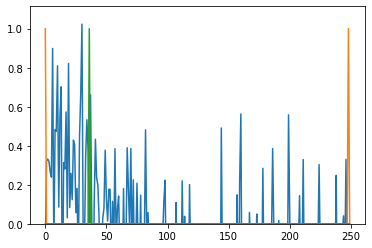

In [4]:
# Graph of dF/F that demonstrates the trials and introduction of rewards.
# Can use indexing to visualize relevant parts of the session.
%matplotlib inline
plt.plot(dFF[:250,1])
plt.plot(trial_start[:250]) 
plt.plot(rewards[:250])
plt.axis(ymin = 0)

In [5]:
# Load behavior information from the trial.
behavior_data = np.load('/root/capsule/data/single-plane-ophys_608551_2022-04-22_12-39-41/behavior/042222-bpod_zaber.npy',
                       allow_pickle = True).tolist()

# Load the name of the specific trials if needed.
face_video_file_names = [y for x,y in zip(behavior_data['scanimage_file_names'],behavior_data['behavior_movie_name_list']) if x != 'no movie for this trial']
face_video_file_names[0][0]

In [6]:
df = pd.read_csv(trial_csv)

# Extracting the number of frames minus the header.
frames = len(df) - 1

# Opening the JSON file with data for the trial.
with open(trial_json_path) as j:
     trial_frames = json.loads(j.read())

# Calculating the total length of the trial, frame rate of the camera, and number of seconds in between frames.        
trial_length = frames * (trial_frames['frame_times'][2] - trial_frames['frame_times'][1])
frame_rate = frames / trial_length
timing = 1 / frame_rate

In [8]:
# Adjust_coordinates method assumes DLC and LP-generated CSV file format.
# It removes the header and merges two following rows together with an underscore in between.
adjusted_coords_df = adjust_coordinates(trial_csv, output_path)
print(adjusted_coords_df)

1 bodyparts_coords             paw1_x              paw1_y     paw1_likelihood  \
3                0  666.2398071289062   321.9339294433594   0.999407172203064   
4                1  666.1493530273438   321.9433898925781   0.999406635761261   
5                2    666.27099609375  321.91558837890625  0.9994521737098694   
6                3  666.4617919921875   321.5268249511719  0.9994128942489624   
7                4  666.3486938476562  321.46197509765625  0.9993722438812256   

1              paw2_x              paw2_y     paw2_likelihood  
3   432.3131103515625  358.46954345703125  0.9982281923294067  
4  432.11834716796875   358.5209655761719  0.9978373050689697  
5   432.4168701171875   358.3779602050781   0.998166024684906  
6  432.47967529296875   358.3233642578125  0.9981838464736938  
7  432.19671630859375  358.85198974609375  0.9977996349334717  
1    bodyparts_coords             paw1_x              paw1_y  \
3                   0  666.2398071289062   321.9339294433594   
4

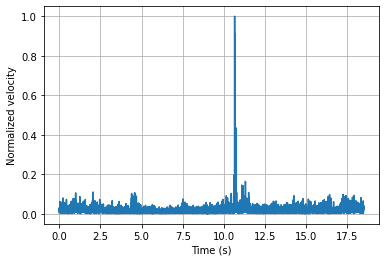

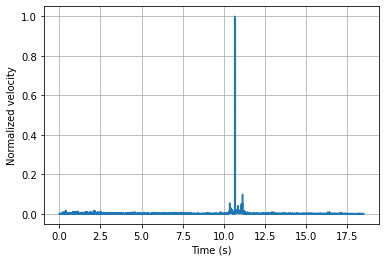

      bodyparts_coords      paw1_x      paw1_y  paw1_likelihood      paw2_x  \
0                    0  666.239807  321.933929         0.999407  432.313110   
1                    1  666.149353  321.943390         0.999407  432.118347   
2                    2  666.270996  321.915588         0.999452  432.416870   
3                    3  666.461792  321.526825         0.999413  432.479675   
4                    4  666.348694  321.461975         0.999372  432.196716   
...                ...         ...         ...              ...         ...   
7699              7699  665.340515  323.318756         0.999589  420.912048   
7700              7700  665.566101  322.797272         0.999589  421.074341   
7701              7701  665.494019  323.111298         0.999576  420.589844   
7702              7702  665.641357  323.700958         0.999612  420.541962   
7703              7703  665.400940  323.919525         0.999612  420.808746   

          paw2_y  paw2_likelihood  paw1_x_velocity 

In [9]:
# Calculating velocity for the body parts in question. Go to the "bodypart_calc.py" module to adjust calculation to needed bodyparts.
csv_file = f'/{output_path}/adjusted_coords.csv'
velocity_df = velocity(csv_file, output_path, frame_rate, timing)

# Change the column names based on the bodypart in question.
for column in velocity_df[['paw1_velocity', 'paw2_velocity']]:
        plt.figure()
        plt.plot(velocity_df['x_rescaled'], velocity_df[column])
        plt.ylabel('Normalized velocity')
        plt.xlabel('Time (s)')
        plt.grid(True)
        plt.show()
        
print(velocity_df)

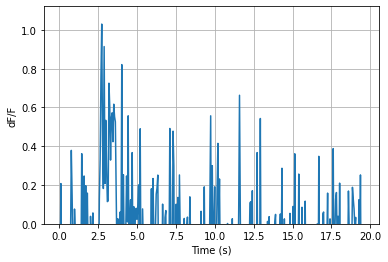

In [10]:
# Creating a calcium imaging dataframe to do further analysis and plot the dF/F/t graph.

dFFt = pd.DataFrame(dFF[868:1249,1])
dFFt.index = dFFt.index / sampling_rate

plt.figure()
plt.plot(dFFt)
plt.xlabel("Time (s)")
plt.ylabel("dF/F")
plt.axis(ymin = 0)
plt.grid(True)
plt.show()

dFFt.to_csv(f'/{output_path}/dFFt_trial.csv')

In [11]:
# Downsampling the velocity dataframe to the same amount of rows as in calcium imaging data.
# Example: there are 21 frames of behavior per 1 frame of calcium imaging for trial_00000.

downsamp_rate = frame_rate / sampling_rate
print(downsamp_rate)

sequence_interval = 1
step_size = np.round(downsamp_rate / sequence_interval).astype("int")

downsamp = pd.read_csv(f'/{output_path}/paw_velocity.csv')

downsampled_df = downsamp.iloc[::step_size, :]
downsampled_df.to_csv(f'/{output_path}/downsamp_paws.csv')

21.464497087109407


In [12]:
calcium = pd.read_csv(f'/{output_path}/dFFt_trial.csv')
behav = pd.read_csv(f'/{output_path}/downsamp_paws.csv')

# Calculating the correlation coefficient for two paws.
paw1_cal_beh = calcium.corrwith(behav['paw1_velocity'], axis=0)
print(f"Correlation coefficient for paw1 is {paw1_cal_beh['0']}.")
paw2_cal_beh = calcium.corrwith(behav['paw2_velocity'], axis=0)
print(f"Correlation coefficient for paw2 is {paw2_cal_beh['0']}.")

Correlation coefficient for paw1 is -0.040228561163369106.
Correlation coefficient for paw2 is -0.07316788135706218.


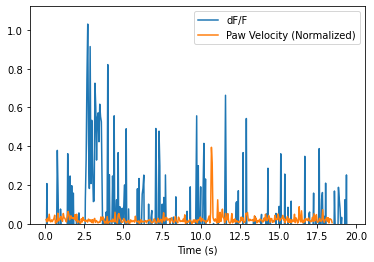

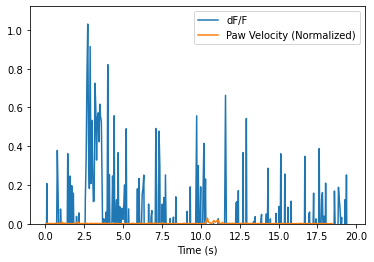

In [13]:
#Creating graphs that demonstrate the concatenation of two normalized graphs.
dFFt['rescaled'] = dFFt.index
ax = dFFt.plot(x='rescaled')
behav.plot(x='x_rescaled', y='paw1_velocity', ax=ax)
plt.axis(ymin = 0)
plt.legend(('dF/F', 'Paw Velocity (Normalized)'), loc='upper right')
plt.xlabel("Time (s)")
plt.savefig(f'/{output_path}/paw1.png')

ax = dFFt.plot(x='rescaled')
behav.plot(x='x_rescaled', y='paw2_velocity', ax=ax)
plt.legend(('dF/F', 'Paw Velocity (Normalized)'), loc='upper right')
plt.xlabel("Time (s)")
plt.axis(ymin = 0)
plt.savefig(f'/{output_path}/paw2.png')